In [ ]:
#Importing the standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import os
import random
import re
import shutil
sns.set_style('darkgrid')
sns.set_palette('pastel')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Defining the input
input_dir='/content/drive/MyDrive/PCB_DATASET/'
os.listdir(input_dir)

['rotate.py',
 'PCB_USED',
 'images',
 'rotation',
 'Annotations',
 'Defect_Patches',
 'images_combined',
 'Inference_Resnet18']

In [ ]:
template_dir=os.path.join(input_dir,'PCB_USED')
template_dir

'/content/drive/MyDrive/PCB_DATASET/PCB_USED'

In [ ]:
#Defining the image directory
img_dir=os.path.join(input_dir,'images')

#Listing the types of defects
os.listdir(img_dir)
types_defect=os.listdir(os.path.join(input_dir,'images'))
types_defect

['Open_circuit',
 'Spur',
 'Mouse_bite',
 'Short',
 'Spurious_copper',
 'Missing_hole']

In [ ]:
#Creating an image path list for ready refernce
img_path_list=[]
#Creating img_path list
for sub_cat in types_defect:
    for file in os.listdir(os.path.join(img_dir,sub_cat)):
        img_path_list.append(os.path.join(img_dir,sub_cat,file))

In [ ]:
rotated_dir=os.path.join(input_dir,'rotation')
os.listdir(rotated_dir)

['Short_angles.txt',
 'Open_circuit_angles.txt',
 'Missing_hole_angles.txt',
 'Spurious_copper_angles.txt',
 'Spur_angles.txt',
 'Mouse_bite_angles.txt',
 'Open_circuit_rotation',
 'Spur_rotation',
 'Spurious_copper_rotation',
 'Short_rotation',
 'Missing_hole_rotation',
 'Mouse_bite_rotation']

In [ ]:
rotated_angle_list=[j for j in os.listdir(rotated_dir) if j.endswith('.txt')]
rotated_angle_list

['Short_angles.txt',
 'Open_circuit_angles.txt',
 'Missing_hole_angles.txt',
 'Spurious_copper_angles.txt',
 'Spur_angles.txt',
 'Mouse_bite_angles.txt']

In [ ]:
types_defect_rotated=[j for j in os.listdir(rotated_dir) if j.endswith('.txt')==False]
types_defect_rotated

['Open_circuit_rotation',
 'Spur_rotation',
 'Spurious_copper_rotation',
 'Short_rotation',
 'Missing_hole_rotation',
 'Mouse_bite_rotation']

In [ ]:
annote_dir=os.path.join(input_dir,'Annotations')
annote_dir

'/content/drive/MyDrive/PCB_DATASET/Annotations'

In [ ]:
type_annot=os.listdir(annote_dir)
type_annot

['Spurious_copper',
 'Spur',
 'Mouse_bite',
 'Missing_hole',
 'Short',
 'Open_circuit']

In [ ]:
#Checking the type of files
file_list=os.listdir(os.path.join(annote_dir,'Mouse_bite'))
file_list[0:5]

['12_mouse_bite_06.xml',
 '08_mouse_bite_10.xml',
 '12_mouse_bite_04.xml',
 '04_mouse_bite_20.xml',
 '05_mouse_bite_08.xml']

In [ ]:
#importing xml ET to parse xml file
import xml.etree.ElementTree as ET

In [ ]:
#Parsing XML to return Bounding box dimensions
def parse_xml(xml_file):

    data=[]

    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find('filename').text
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    for obj in root.findall('object'):
        name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        data.append({
            'filename': filename,
            'width': width,
            'height': height,
            'class': name,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })

    return data

In [ ]:
#Retrieving data for all files
data=[]
all_data=[]

for x in type_annot:
    for file in os.listdir(os.path.join(annote_dir,x)):
        xml_file_path=os.path.join(os.path.join(annote_dir,x),file)
        data=parse_xml(xml_file_path)
        all_data.extend(data)

In [ ]:
#Creating a dataframe to store the annotations
df_annot=pd.DataFrame(all_data)
df_annot

,filename,width,height,class,xmin,ymin,xmax,ymax
0,08_spurious_copper_09.jpg,2759,2154,spurious_copper,2014,667,2102,725
1,08_spurious_copper_09.jpg,2759,2154,spurious_copper,1743,1152,1794,1236
2,08_spurious_copper_09.jpg,2759,2154,spurious_copper,2035,1046,2099,1134
3,08_spurious_copper_09.jpg,2759,2154,spurious_copper,1359,1798,1464,1846
4,08_spurious_copper_09.jpg,2759,2154,spurious_copper,796,838,855,925
...,...,...,...,...,...,...,...,...
2948,04_open_circuit_18.jpg,3056,2464,open_circuit,493,501,551,568
2949,04_open_circuit_18.jpg,3056,2464,open_circuit,397,1077,457,1141
2950,01_open_circuit_19.jpg,3034,1586,open_circuit,1684,354,1723,385
2951,01_open_circuit_19.jpg,3034,1586,open_circuit,713,1000,738,1027


In [ ]:
# Don't run this cell multiple times as it will create multiple copies of the images

import os
import shutil

# Path to the main images folder (stored in img_dir)
img_dir = "/content/drive/MyDrive/PCB_DATASET/images/"  # Path to your images folder

# Define the source directories for each category inside img_dir
source_dirs = [
    os.path.join(img_dir, "Missing_hole"),
    os.path.join(img_dir, "Mouse_bite"),
    os.path.join(img_dir, "Open_circuit"),
    os.path.join(img_dir, "Short"),
    os.path.join(img_dir, "Spur"),
    os.path.join(img_dir, "Spurious_copper")
]

# Define the destination directory for the combined images (Writable location)
destination_dir = "/content/drive/MyDrive/PCB_DATASET/images_combined/"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Loop through each source directory and copy all files to the destination
for source_dir in source_dirs:
    if os.path.exists(source_dir):
        # Get all files in the current directory
        files = os.listdir(source_dir)

        # Copy each file to the destination directory
        for file in files:
            file_path = os.path.join(source_dir, file)
            if os.path.isfile(file_path):
                shutil.copy(file_path, destination_dir)
    else:
        print(f"Directory {source_dir} does not exist.")

# Now check how many files are in the destination folder
files_in_combined = os.listdir(destination_dir)
print(f"Number of files copied: {len(files_in_combined)}")

Number of files copied: 693


Text(0.5, 0, 'No of defects in one PCB')

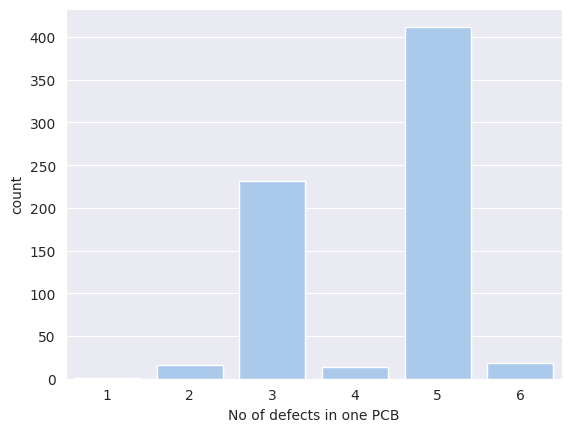

In [ ]:
#Visualizing the no of defects in each pcb
df_multiple_defects=pd.DataFrame(df_annot['filename'].value_counts())
sns.countplot(df_multiple_defects,x='count')
plt.xlabel('No of defects in one PCB')

In [ ]:
#Defining a function to view image along with bounding box

def draw_bounding_boxes(image_path, bounding_boxes,annotation):
    """
    Draws multiple bounding boxes on an image using Matplotlib.

    Args:
        image_path: The path to the image file.
        bounding_boxes: A list of bounding boxes, each represented as a tuple or list containing
                       (min_x, min_y, max_x, max_y).
    """

    # Load the image
    img = plt.imread(image_path)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15,10))

    # Display the image
    ax.imshow(img)

    # Draw each bounding box
    for bbox in bounding_boxes:
        min_x, min_y, max_x, max_y = bbox
        width = max_x - min_x
        height = max_y - min_y
        rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Calculate the centroid of the bounding box
        centroid_x = (min_x + max_x) / 2
        centroid_y = (min_y + max_y) / 2

        # Add the annotation to the centroid
        ax.annotate( annotation,(centroid_x,centroid_y),(max_x+20,max_y+20),
            fontsize=10,color='white',
            horizontalalignment='right', verticalalignment='top')

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])



    # Show the plot
    plt.show()

In [ ]:
#Getting filename from filepath
filepath=img_path_list[0]
filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)


In [ ]:
filepath

'/content/drive/MyDrive/PCB_DATASET/images/Open_circuit/10_open_circuit_01.jpg'

In [ ]:
filename

'10_open_circuit_01.jpg'

In [ ]:
#Defining function to select the a file and return image along with bounding box
def visualize_annotations(list_image_path,df):
    for i in list_image_path:
        filepath=i
        filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
        df_selected=df[df['filename']==filename]
        width=df_selected['width'].values
        height=df_selected['height'].values
        class_name=df_selected['class'].values
        xmin=df_selected['xmin'].values
        ymin=df_selected['ymin'].values
        xmax=df_selected['xmax'].values
        ymax=df_selected['ymax'].values

        bbox=zip(xmin,ymin,xmax,ymax)
        draw_bounding_boxes(filepath, bbox,class_name[0])

In [ ]:
random.shuffle(img_path_list)

visualize_annotations(img_path_list[0:5],df_annot)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
destination_dir = "/content/drive/MyDrive/PCB_DATASET/images_combined/"

PyTorch Version: 2.9.0+cpu
Using device: cpu
Preview of the provided annotation DataFrame:
                    filename  width  height       class_name  xmin  ymin  \
0  08_spurious_copper_09.jpg   2759    2154  spurious_copper  2014   667   
1  08_spurious_copper_09.jpg   2759    2154  spurious_copper  1743  1152   
2  08_spurious_copper_09.jpg   2759    2154  spurious_copper  2035  1046   
3  08_spurious_copper_09.jpg   2759    2154  spurious_copper  1359  1798   
4  08_spurious_copper_09.jpg   2759    2154  spurious_copper   796   838   

   xmax  ymax  
0  2102   725  
1  1794  1236  
2  2099  1134  
3  1464  1846  
4   855   925  

6 classes detected in the DataFrame: ['missing_hole', 'mouse_bite', 'open_circuit', 'short', 'spur', 'spurious_copper']
Number of defects - Train: 2071, Validation: 448, Test: 434

Visualizing a batch of cropped defect patches...


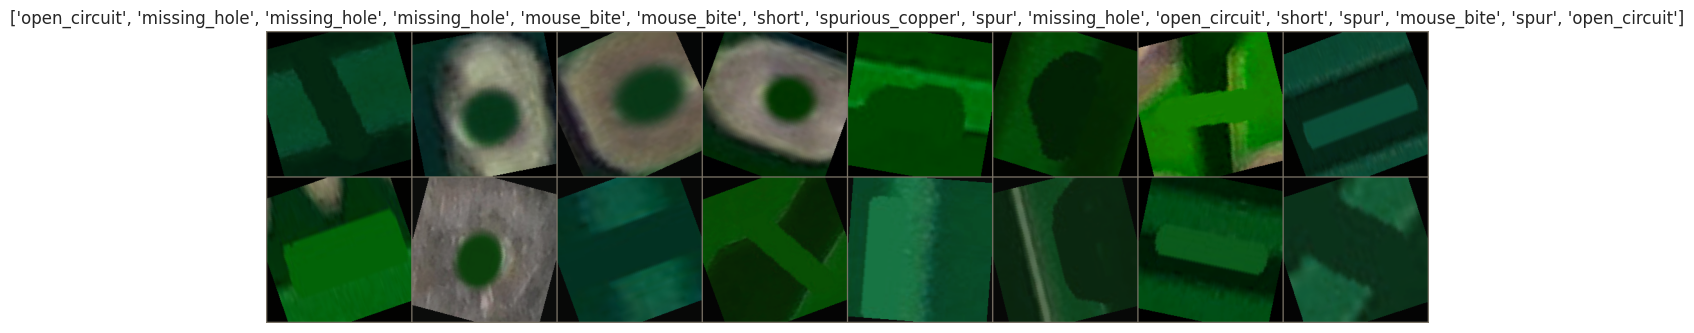

In [ ]:
# ===================================================================
# 1. IMPORTING LIBRARIES AND CONFIGURATION
# ===================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms, utils

from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import time
import copy
import os

# Basic configuration
print("PyTorch Version:", torch.__version__)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ===================================================================
# 2. DATA PREPARATION (using df_annot and img_dir)
# ===================================================================
# ASSUMING 'df_annot' (DataFrame) AND 'img_dir' (str) ALREADY EXIST.

img_dir = destination_dir

# To avoid conflicts with the Python keyword 'class', rename the column
if 'class' in df_annot.columns:
    df_annot = df_annot.rename(columns={'class': 'class_name'})

print("Preview of the provided annotation DataFrame:")
print(df_annot.head())

# Get the list of classes and number of classes
class_names = sorted(df_annot['class_name'].unique())
num_classes = len(class_names)
print(f"\n{num_classes} classes detected in the DataFrame: {class_names}")

# --- Train/Validation/Test split based on FILE NAMES ---
# This is CRUCIAL to avoid data leakage.
unique_filenames = df_annot['filename'].unique()
# 693 images -> train_files : 485 , test_val_files : 208
train_files, test_val_files = train_test_split(unique_filenames, test_size=0.3, random_state=42)
# 208 -> val_files : 104 , test_files : 104
val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)  # 0.3 * 0.5 = 0.15


# Create DataFrames for each dataset
train_df = df_annot[df_annot['filename'].isin(train_files)].reset_index(drop=True)
val_df = df_annot[df_annot['filename'].isin(val_files)].reset_index(drop=True)
test_df = df_annot[df_annot['filename'].isin(test_files)].reset_index(drop=True)

dataset_sizes = {'train': len(train_df), 'val': len(val_df), 'test': len(test_df)}
print(f"Number of defects - Train: {dataset_sizes['train']}, Validation: {dataset_sizes['val']}, Test: {dataset_sizes['test']}")
########################################
# --- Data Augmentation and Normalization ---
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize((224, 224)),  # Standardize patch size
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation(15),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }
############################################
# --- Data Augmentation and Normalization ---  #CHANGE
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(25),
        transforms.ColorJitter(
            brightness=0.3,
            contrast=0.3,
            saturation=0.3,
            hue=0.1
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225]
        )
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            [0.485, 0.456, 0.406],
            [0.229, 0.224, 0.225]
        )
    ]),
}


# --- Custom Dataset class for cropping images ---
class PCBCropDataset(Dataset):
    def __init__(self, dataframe, image_dir, class_names, transform=None):
        self.df = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(class_names)}

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_filename = row['filename']
        box = (row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        label_idx = self.class_to_idx[row['class_name']]

        try:
            img_path = os.path.join(self.image_dir, img_filename)
            image = Image.open(img_path).convert('RGB')
            cropped_image = image.crop(box)
        except FileNotFoundError:
            print(f"Warning: File not found {img_path}. Returning an empty tensor.")
            return torch.zeros((3, 224, 224)), -1  # Handle missing file case

        if self.transform:
            cropped_image = self.transform(cropped_image)

        return cropped_image, label_idx

# --- Create datasets and dataloaders ---
train_dataset = PCBCropDataset(train_df, img_dir, class_names, transform=data_transforms['train'])
val_dataset = PCBCropDataset(val_df, img_dir, class_names, transform=data_transforms['val'])
test_dataset = PCBCropDataset(test_df, img_dir, class_names, transform=data_transforms['val'])

# Use a smaller batch size initially to avoid memory issues
batch_size = 16

dataloaders = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=os.cpu_count()),
    'val': DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count()),
    'test': DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=os.cpu_count())
}

# --- Visualize a batch of cropped defect patches ---
print("\nVisualizing a batch of cropped defect patches...")
inputs, classes_idx = next(iter(dataloaders['train']))
out = utils.make_grid(inputs)

# Inverse normalization for display
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406]); std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean; inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 8)); plt.imshow(inp)
    if title is not None: plt.title(title)
    plt.axis('off'); plt.show()

imshow(out, title=[class_names[x] for x in classes_idx])


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 113MB/s]


Epoch 1/50 | ----------
Train Loss: 0.4937 Acc: 0.8397
Val Loss: 0.1858 Acc: 0.9464
Validation loss improved (inf -> 0.1858). Saving model...

Epoch 2/50 | ----------
Train Loss: 0.1263 Acc: 0.9701
Val Loss: 0.2714 Acc: 0.9018

Epoch 3/50 | ----------
Train Loss: 0.0960 Acc: 0.9710
Val Loss: 0.0841 Acc: 0.9665
Validation loss improved (0.1858 -> 0.0841). Saving model...

Epoch 4/50 | ----------
Train Loss: 0.0702 Acc: 0.9754
Val Loss: 0.0334 Acc: 0.9888
Validation loss improved (0.0841 -> 0.0334). Saving model...

Epoch 5/50 | ----------
Train Loss: 0.0426 Acc: 0.9860
Val Loss: 0.0151 Acc: 0.9955
Validation loss improved (0.0334 -> 0.0151). Saving model...

Epoch 6/50 | ----------
Train Loss: 0.0328 Acc: 0.9908
Val Loss: 0.0454 Acc: 0.9799

Epoch 7/50 | ----------
Train Loss: 0.0367 Acc: 0.9845
Val Loss: 0.0384 Acc: 0.9911

Epoch 8/50 | ----------
Train Loss: 0.0392 Acc: 0.9874
Val Loss: 0.0815 Acc: 0.9598

Epoch 9/50 | ----------
Train Loss: 0.0314 Acc: 0.9879
Val Loss: 0.0359 Acc: 0.

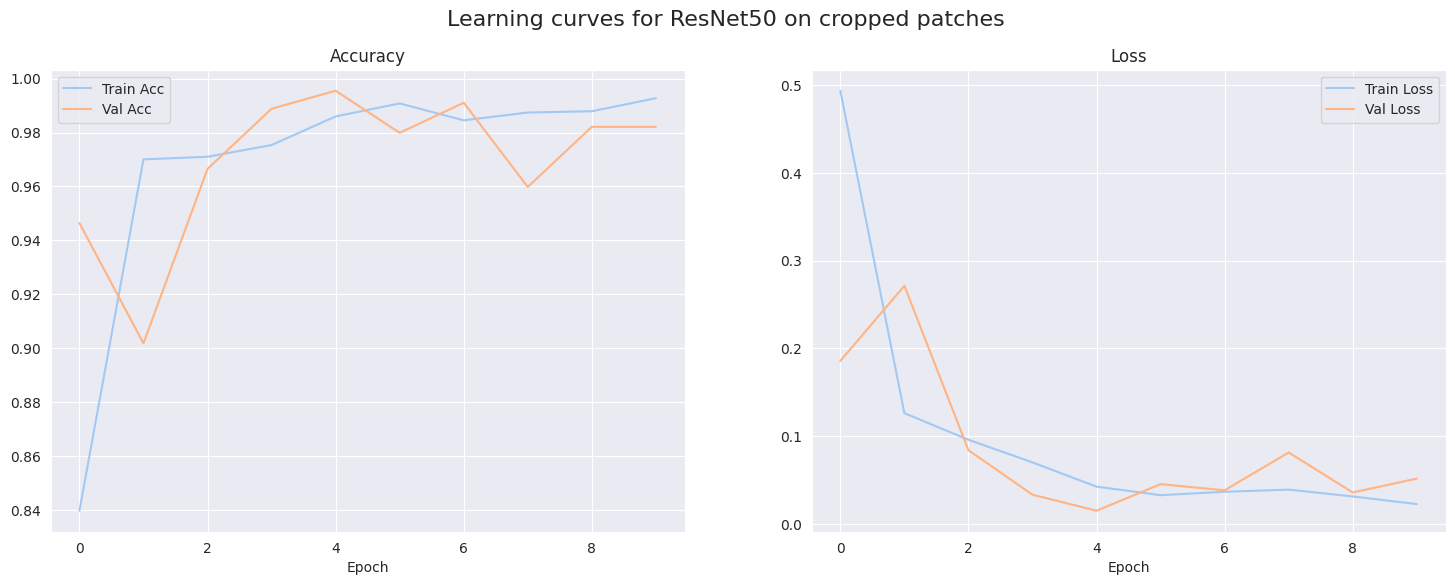


--- Final evaluation of model 'ResNet50' on the Test set ---

                 precision    recall  f1-score   support

   missing_hole     1.0000    1.0000    1.0000        68
     mouse_bite     1.0000    1.0000    1.0000        75
   open_circuit     1.0000    1.0000    1.0000        60
          short     1.0000    0.9867    0.9933        75
           spur     0.9848    1.0000    0.9924        65
spurious_copper     1.0000    1.0000    1.0000        91

       accuracy                         0.9977       434
      macro avg     0.9975    0.9978    0.9976       434
   weighted avg     0.9977    0.9977    0.9977       434



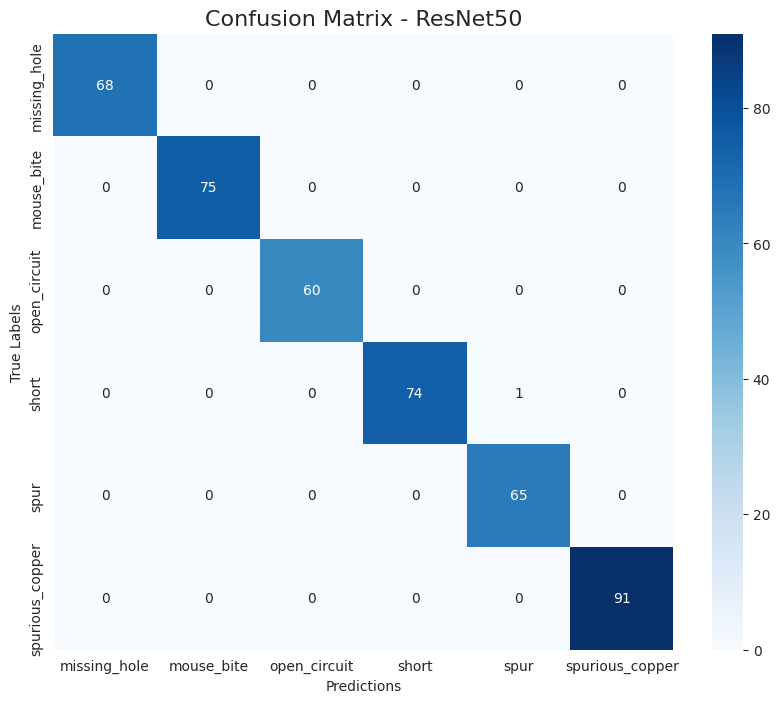

In [ ]:
# ===================================================================
# 3. PRETRAINED MODEL (ResNet18 )
# ===================================================================
# def get_pretrained_model(num_classes):
#     model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
#     # Freeze the weights of the pretrained layers
#     for param in model.parameters():
#         param.requires_grad = False

#     # Replace the final layer to adapt it to our problem
#     num_ftrs = model.fc.in_features
#     model.fc = nn.Linear(num_ftrs, num_classes)

    # return model.to(device)


# (ResNet50 - best performing approach)
def get_pretrained_model(num_classes):      #CHANGE
    model = models.resnet50(
        weights=models.ResNet50_Weights.IMAGENET1K_V2
    )

    # Unfreeze only layer4 and fc (fine-tuning)
    for name, param in model.named_parameters():
        if "layer4" in name or "fc" in name:
            param.requires_grad = True
        else:
            param.requires_grad = False

    # Replace the final layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)

    return model.to(device)



# ===================================================================
# 4. TRAINING AND VALIDATION FUNCTION
# ===================================================================
def train_model(model, criterion, optimizer, num_epochs=50, patience=5):
    since = time.time()
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}' + ' | ' + '-'*10)
        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()
            running_loss, running_corrects = 0.0, 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)
                    if phase == 'train':
                        loss.backward(); optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            if phase == 'val':
                if epoch_loss < best_loss:
                    print(f"Validation loss improved ({best_loss:.4f} -> {epoch_loss:.4f}). Saving model...")
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    epochs_no_improve = 0
                else:
                    epochs_no_improve += 1

        if epochs_no_improve >= patience:
            print(f"\nEarly stopping triggered after {patience} epochs with no improvement.")
            break
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s')
    print(f'Best Validation Loss: {best_loss:4f}')

    model.load_state_dict(best_model_wts)
    return model, history



# ===================================================================
# 5. TRAINING EXECUTION
# ===================================================================
# Clear the GPU cache to ensure memory is free
if torch.cuda.is_available():
    # torch.cuda.empty_cache()
    pass

# Instantiate the model
resnet_model = get_pretrained_model(num_classes)

# Define the loss function and optimizer
from sklearn.utils.class_weight import compute_class_weight

labels = train_df['class_name'].map(
    {c:i for i,c in enumerate(class_names)}
)

class_weights=compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

criterion = nn.CrossEntropyLoss(
    weight=torch.tensor(class_weights).float().to(device)
)

# Optimize only parameters of the new layer (those that are not frozen)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, resnet_model.parameters()), lr=0.001)

# Start training
best_resnet_model, history = train_model(resnet_model, criterion, optimizer, num_epochs=50, patience=5)



# ===================================================================
# 6. RESULT ANALYSIS AND EVALUATION
# ===================================================================
# --- Plot learning curves ---
def plot_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f"Learning curves for {model_name}", fontsize=16)
    ax1.plot(history['train_acc'], label='Train Acc'); ax1.plot(history['val_acc'], label='Val Acc')
    ax1.set_title('Accuracy'); ax1.set_xlabel('Epoch'); ax1.legend(); ax1.grid(True)
    ax2.plot(history['train_loss'], label='Train Loss'); ax2.plot(history['val_loss'], label='Val Loss')
    ax2.set_title('Loss'); ax2.set_xlabel('Epoch'); ax2.legend(); ax2.grid(True)
    plt.show()

plot_history(history, "ResNet50 on cropped patches")

# --- Evaluation on the test set ---
def evaluate_model(model, dataloader, model_name):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f"\n--- Final evaluation of model '{model_name}' on the Test set ---\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=16)
    plt.xlabel('Predictions'); plt.ylabel('True Labels')
    plt.show()

evaluate_model(best_resnet_model, dataloaders['test'], "ResNet50")


In [ ]:
# Path where you want to save
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/best_resnet50_pcb_defects_50epochs.pth"

# Save only the state_dict (recommended)
torch.save({
    "model_state_dict": best_resnet_model.state_dict(),
    "class_names": class_names,
}, MODEL_PATH)

print(f"Model saved to {MODEL_PATH}")

Model saved to /content/drive/MyDrive/Colab Notebooks/best_resnet50_pcb_defects_50epochs.pth
